## OpenCV 이미지 연산


CoLab에서 파일을 업로드하는 방법은 다음과 같습니다.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


1. OpenCV를 활용한 이미지 크기 및 픽셀 정보 확인
- 크기 : 첫 두개 정보. 이미지 크기.
- 색정보 : 세번째 값 픽셀(두께) 3이 RGB란거
  - **이미지[가로, 세로] -> 반환값 : 그 위치의 RGB값**
  - 단 이때의 출력은 opencv 특성상 **BGR** 순으로 출력됨
    - (이미지를 코랩상에서 출력할때에는 plt 이용해서 **RGB**순으로 해야하고)

In [2]:
import cv2
image = cv2.imread('cat.jpg')

# 픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

# 이미지 Numpy 객체의 특정 픽셀을 가리킵니다.
px = image[100, 100]

# B, G, R 순서로 출력됩니다. 
# (단, Gray Scale인 경우에는 B, G, R로 구분되지 않습니다.)
print(px)

# R 값만 출력하기
print(px[2])

(380, 441, 3)
502740
[111 151 179]
179


2. OpenCV를 활용한 특정 범위 픽셀 변경
- 그냥 이미지[가로범위, 세로범위] = 주고픈 픽셀값 [a,b,c] 하면된다

--- 0.01664900779724121 seconds ---
--- 0.0011131763458251953 seconds ---


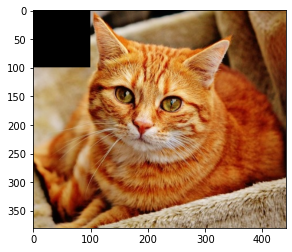

In [3]:
import cv2
import matplotlib.pyplot as plt
import time

image = cv2.imread('cat.jpg')

start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
image[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# 출력때는 항상 cvt로 RGB로 바꾸어줘야!!
plt.show()

3. OpenCV를 활용한 ROI(Region of Interest: 관심 있는 영역) 추출

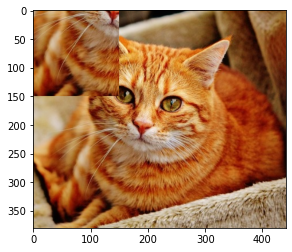

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')

# Numpy Slicing: ROI 처리 가능
roi = image[200:350, 50:200]

# 복사한 영역만큼을 그대로 주면됨.
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### OpenCV를 활용한 픽셀별 색상 다루기
- image[:, :, 2] = 0
  - 어느영역이든 픽셀(두께)값이 2(b,g,r 순이니까) r(빨간색)인것을 0으로 바꾼다

### 이미지 인덱싱
- **image[a,b] : [255,123,84] **
  - a,b 위치인곳 (혹은 영역) 을 저 색상으로 바꾼다
- **image[a,b,0~2] : 30**
  - a,b 위치이면서 설정한 색상영역(0=B,1=G,2=R)을 30으로 해준다 

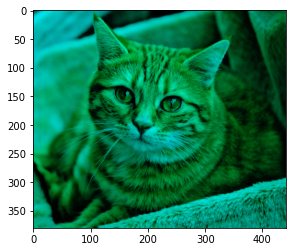

In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
image[:, :, 2] = 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()